<a href="https://www.kaggle.com/code/wambuimucheke/vehicle-insurance-data-cleaning-with-python?scriptVersionId=173507014" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **DATA CLEANING THE VEHICLE INSURANCE DATASET USING PYTHON**

### **Introduction**

I wanted to do some EDA and hypothesis testing with this dataset using R, but came to realise the dataset is very messy. I attempted to clean it using R, but one month down the line I was going in circles because I'm a beginner still with a lot to learn, so I attempted doing the cleaning with Python and it was mostly a success, at least it didn't make me want to cry that much. 

So here's my attempt at cleaning the dataset, any feedback is welcome as I am still in the learning process.


### **Preparing and importing the dataset** 

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# import the dataset
vdf1 = pd.read_csv('/kaggle/input/vehicle-insurance-data/motor_data11-14lats.csv')
vdf2 = pd.read_csv('/kaggle/input/vehicle-insurance-data/motor_data14-2018.csv')


In [2]:
# join the two datasets
frames = [vdf1,vdf2]
vdf = pd.concat(frames)

In [3]:
# convert the data to a dataframe
vdf = pd.DataFrame(vdf)

In [4]:
# check the shape of the dataframe
vdf.shape

(802036, 16)

In [5]:
# check and remove duplicated index
vdf = vdf[~vdf.index.duplicated()]
vdf.shape

(508499, 16)

In [6]:
# check the head of the dataset
vdf.head()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,08-AUG-13,07-AUG-14,08,1202,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,08-AUG-12,07-AUG-13,08,1202,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,08-AUG-11,07-AUG-12,08,1202,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,08-JUL-11,07-AUG-11,08,1202,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,08-AUG-13,07-AUG-14,08,1202,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43


In [7]:
# check the tail of the dataset
vdf.tail()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
508494,0,02-FEB-18,01-FEB-19,12,1202,0.0,294.51,5001350484,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508495,0,02-FEB-18,01-FEB-19,12,1202,0.0,299.51,5001350489,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508496,0,02-FEB-18,01-FEB-19,12,1202,0.0,294.51,5001350498,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508497,0,02-FEB-18,01-FEB-19,12,1202,0.0,294.51,5001350502,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508498,0,02-FEB-18,01-FEB-19,12,1202,0.0,294.51,5001350505,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN


In [8]:
# check the column names
print(vdf.columns)

Index(['SEX', 'INSR_BEGIN', 'INSR_END', 'EFFECTIVE_YR', 'INSR_TYPE',
       'INSURED_VALUE', 'PREMIUM', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM',
       'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE', 'USAGE',
       'CLAIM_PAID'],
      dtype='object')


In [9]:
# check the datatypes
vdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508499 entries, 0 to 508498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                508499 non-null  int64  
 1   INSR_BEGIN         508499 non-null  object 
 2   INSR_END           508499 non-null  object 
 3   EFFECTIVE_YR       508495 non-null  object 
 4   INSR_TYPE          508499 non-null  int64  
 5   INSURED_VALUE      508499 non-null  float64
 6   PREMIUM            508483 non-null  float64
 7   OBJECT_ID          508499 non-null  int64  
 8   PROD_YEAR          508383 non-null  float64
 9   SEATS_NUM          508340 non-null  float64
 10  CARRYING_CAPACITY  385878 non-null  float64
 11  TYPE_VEHICLE       508499 non-null  object 
 12  CCM_TON            508497 non-null  float64
 13  MAKE               508494 non-null  object 
 14  USAGE              508499 non-null  object 
 15  CLAIM_PAID         35454 non-null   float64
dtypes: floa

### **Shaping the columns**

In [10]:
# remove duplicates
print('Shape before removing duplicates:', vdf.shape)
vdf = vdf.drop_duplicates()
print('Shape after removing duplicates:', vdf.shape)

Shape before removing duplicates: (508499, 16)
Shape after removing duplicates: (508322, 16)


In [11]:
# check for nulls
vdf.isnull().sum()

SEX                       0
INSR_BEGIN                0
INSR_END                  0
EFFECTIVE_YR              4
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                  16
OBJECT_ID                 0
PROD_YEAR               116
SEATS_NUM               159
CARRYING_CAPACITY    122586
TYPE_VEHICLE              0
CCM_TON                   2
MAKE                      5
USAGE                     0
CLAIM_PAID           472868
dtype: int64

Our dataset has a large number of null values. Because the nulls are so few in some columns we'll drop them. The ones with a high number of nulls we'll handle later.

In [12]:
# drop null values for some columns
vdf = vdf.dropna(subset=['PREMIUM','PROD_YEAR', 'CCM_TON', 'MAKE', 'SEATS_NUM'])
vdf.isnull().sum()

SEX                       0
INSR_BEGIN                0
INSR_END                  0
EFFECTIVE_YR              4
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                   0
OBJECT_ID                 0
PROD_YEAR                 0
SEATS_NUM                 0
CARRYING_CAPACITY    122446
TYPE_VEHICLE              0
CCM_TON                   0
MAKE                      0
USAGE                     0
CLAIM_PAID           472692
dtype: int64

I'll drop the effective year column as I was unable to find its usefullness

In [13]:
# drop effective year column
vdf.drop(columns = 'EFFECTIVE_YR', inplace = True)

In the claim paid column I will replace null values with zero, because a null claim means no claim was paid

In [14]:
# replace null values with 0 in the claim_paid column
vdf['CLAIM_PAID'] = vdf['CLAIM_PAID'].fillna(0)

In [15]:
# Create a new column to determine if the claim was paid
vdf['CLAIM'] = np.where(vdf['CLAIM_PAID'] == 0, 'NO', 'YES')

In [16]:
# map the sex column
vdf.loc[:,'GENDER'] = vdf['SEX'].map({0: 'Legal Entity', 1: 'Male', 2: 'Female'})

# drop the sex column
vdf.drop(columns = 'SEX', inplace = True)

In [17]:
# map the sex column
vdf.loc[:,'TYPE_INSR'] = vdf['INSR_TYPE'].map({1201: 'Private', 1202: 'Commercial', 1204: 'Motor Trade Road Risk'})

# drop the insr_type column
vdf.drop(columns = 'INSR_TYPE', inplace = True)

Let's see how the dataframe looks so far

In [18]:
# check the head
vdf.head()

,INSR_BEGIN,INSR_END,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID,CLAIM,GENDER,TYPE_INSR
0,08-AUG-13,07-AUG-14,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,NO,Legal Entity,Commercial
1,08-AUG-12,07-AUG-13,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,NO,Legal Entity,Commercial
2,08-AUG-11,07-AUG-12,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,NO,Legal Entity,Commercial
3,08-JUL-11,07-AUG-11,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,NO,Legal Entity,Commercial
4,08-AUG-13,07-AUG-14,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43,YES,Legal Entity,Commercial


In [19]:
# check for inconsistent data
vdf.describe()

,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,CCM_TON,CLAIM_PAID
count,5.081380e+05,508138.000000,5.081380e+05,508138.000000,508138.000000,385692.000000,508138.000000,5.081380e+05
mean,4.899990e+05,7040.074980,5.000529e+09,2005.063748,5.931251,495.627136,3033.209466,1.920993e+04
std,9.315477e+05,10616.134041,3.781568e+05,10.497571,13.011068,3964.520421,3420.681396,4.662878e+05
min,0.000000e+00,0.000000,5.000018e+09,1950.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,668.900000,5.000176e+09,2000.000000,1.000000,0.000000,200.000000,0.000000e+00
50%,1.000000e+05,2700.300000,5.000461e+09,2008.000000,3.000000,6.000000,2446.000000,0.000000e+00
75%,7.000000e+05,8793.740000,5.000863e+09,2013.000000,4.000000,32.600000,4164.000000,0.000000e+00
max,2.500000e+08,542942.150000,5.001351e+09,2018.000000,199.000000,1000000.000000,20000.000000,1.524458e+08


Looking at the data, there is some inconsistent data. Some columns have 0 values, while others the 3rd quantile and max values have a wide difference alluding to the existence of outliers. 

### **Dealing with 0 values**

In [20]:
# count how many 0s are in columns
insured_value_zeros = (vdf['INSURED_VALUE'] == 0).sum()
print('Number of values with zero in insured value:', insured_value_zeros)

premium_zeros = (vdf['PREMIUM'] == 0).sum()
print('Number of values with zero in premium:', premium_zeros)

carrying_capacity_zeros = (vdf['CARRYING_CAPACITY'] == 0).sum()
print('Number of values with zero in carrying capacity:', carrying_capacity_zeros)

seats_num_zeros = (vdf['SEATS_NUM'] == 0).sum()
print('Number of values with zero in number of seats:', seats_num_zeros)

Number of values with zero in insured value: 231456
Number of values with zero in premium: 23
Number of values with zero in carrying capacity: 152895
Number of values with zero in number of seats: 39464


In [21]:
# drop 0s in the premium column
vdf = vdf[vdf['PREMIUM'] != 0]

In [22]:
# replace 0s with median in the insured value column
# Calculate the median of each vehicle type by make and production year
median_insured_value = vdf.groupby(['TYPE_VEHICLE','MAKE', 'PROD_YEAR'])['INSURED_VALUE'].transform('median')[0]

# replace the 0s with the median
vdf['INSURED_VALUE'] = vdf['INSURED_VALUE'].replace(0, median_insured_value)

In [23]:
# replace the 0s in the carrying capacity column with median
# calculate the median of each vehicle type
median_carrying_capacity = vdf.groupby(['TYPE_VEHICLE','MAKE'])['CARRYING_CAPACITY'].transform('median')[0]

# replace 0s with the median
vdf['CARRYING_CAPACITY'] = vdf['CARRYING_CAPACITY'].replace(0, median_carrying_capacity)

In [24]:
# replace 0s in the seats column with median
# Calculate the median of each vehicle type's number of seats
median_seats_by_type = vdf.groupby('TYPE_VEHICLE')['SEATS_NUM'].transform('median')[0]

# Replace 0 values with the median of each vehicle type
vdf['SEATS_NUM'] = vdf['SEATS_NUM'].replace(0, median_seats_by_type)

### **Dealing with outliers**

In [25]:
# create a copy of dataset
df = vdf.copy()

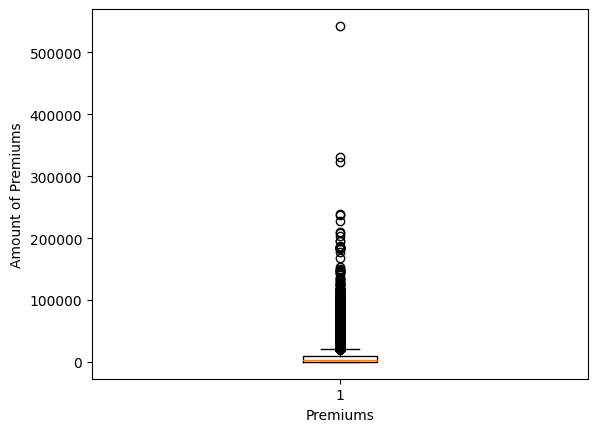

In [26]:
# check for outliers in the premium column
plt.boxplot(vdf['PREMIUM'])
plt.xlabel('Premiums')
plt.ylabel('Amount of Premiums')
plt.show()

I'll be using z score with 1.5 because the dataset has too many outliers.

Before outliers are removed: 508115
After outliers are removed: 465889


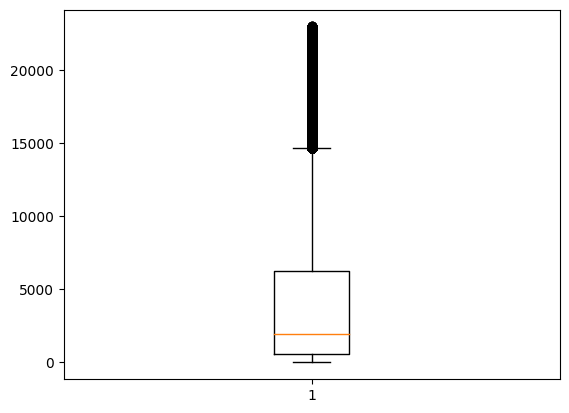

In [27]:
# remove outliers using z score method
print('Before outliers are removed:', len(vdf))
    
# find lower and upper limit
lower_limit = vdf['PREMIUM'].mean() - (1.5* vdf['PREMIUM'].std())
upper_limit = vdf['PREMIUM'].mean() + (1.5* vdf['PREMIUM'].std())

# find outliers
vdf_outliers = np.where(vdf['PREMIUM'] > upper_limit, True,
                        np.where(vdf['PREMIUM'] < lower_limit, True, False))

# remove outliers
vdf= vdf.loc[~(vdf_outliers)]

print('After outliers are removed:', len(vdf))

# plot 
plt.boxplot(vdf['PREMIUM'])
plt.show()

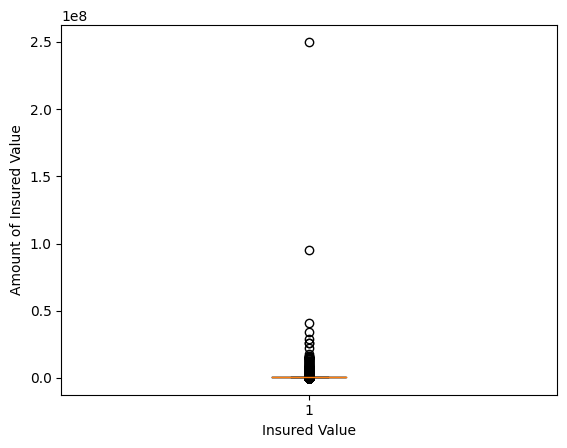

In [28]:
# check for outliers in the insured value column
plt.boxplot(vdf['INSURED_VALUE'])
plt.xlabel('Insured Value')
plt.ylabel('Amount of Insured Value')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


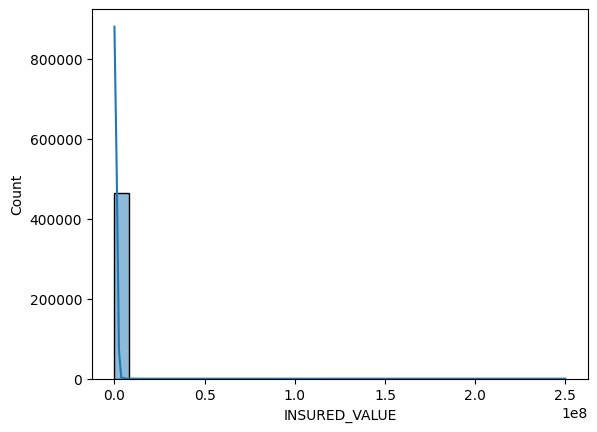

In [29]:
# check the distribution of insured value before removing outliers
sns.histplot(data= vdf, x='INSURED_VALUE', bins = 30, kde=True)
plt.show()

Before outliers are removed: 465889
After outliers are removed: 443727


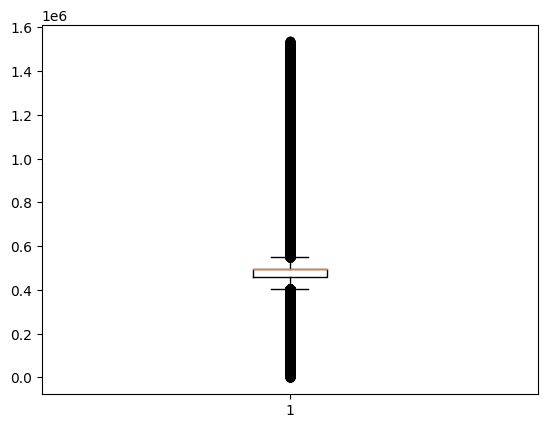

In [30]:
# remove outliers using z score method
print('Before outliers are removed:', len(vdf))

# find the lower and upper limit
lower_limit = vdf['INSURED_VALUE'].mean() - (1.5 * vdf['INSURED_VALUE'].std())
upper_limit = vdf['INSURED_VALUE'].mean() + (1.5 * vdf['INSURED_VALUE'].std())

# find the outliers
vdf_outliers = np.where(vdf['INSURED_VALUE'] > upper_limit, True,
                       np.where(vdf['INSURED_VALUE'] < lower_limit, True, False))

# remove outliers
vdf = vdf.loc[~(vdf_outliers)]

print('After outliers are removed:', len(vdf))

# plot
plt.boxplot(vdf['INSURED_VALUE'])
plt.show()

It's not the prettiest in the bunch, but let's see how it looks as a histogram

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


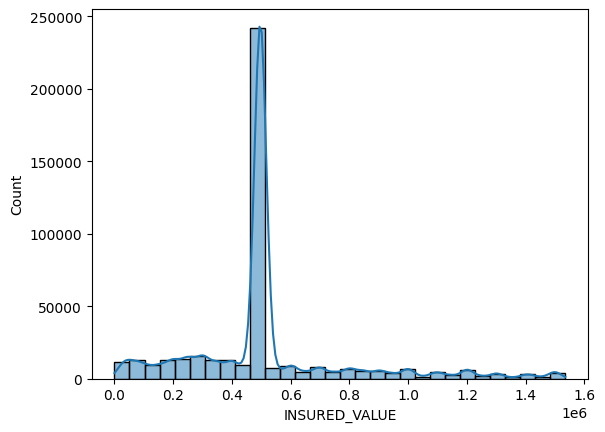

In [31]:
# check the distribution of insured value after removing outliers
sns.histplot(data= vdf, x='INSURED_VALUE', bins = 30, kde=True)
plt.show()

Text(0.5, 1.0, 'Distribution of carrying capacity per vehicle type')

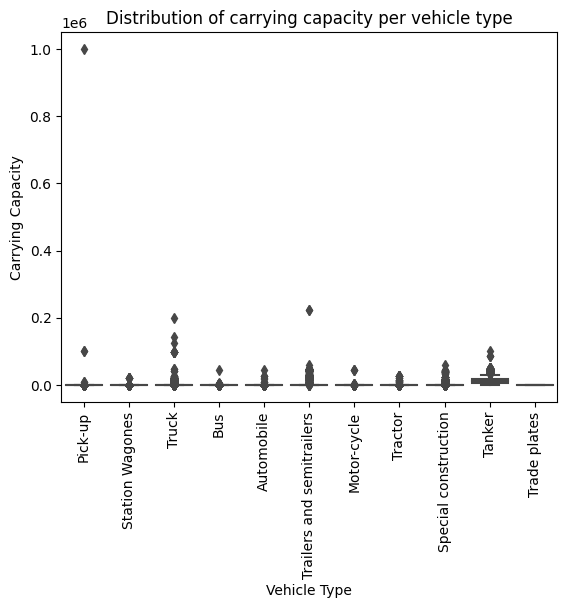

In [32]:
# check the distribution of carrying capacity per vehicle type
sns.boxplot(data = vdf, x='TYPE_VEHICLE', y='CARRYING_CAPACITY')
plt.ylabel('Carrying Capacity')
plt.xlabel('Vehicle Type')
plt.xticks(rotation = 90)
plt.title('Distribution of carrying capacity per vehicle type')

Before the outliers are removed: 443727
After the outliers are removed: 438647


Text(0.5, 1.0, 'Distribution of carrying capacity per vehicle type')

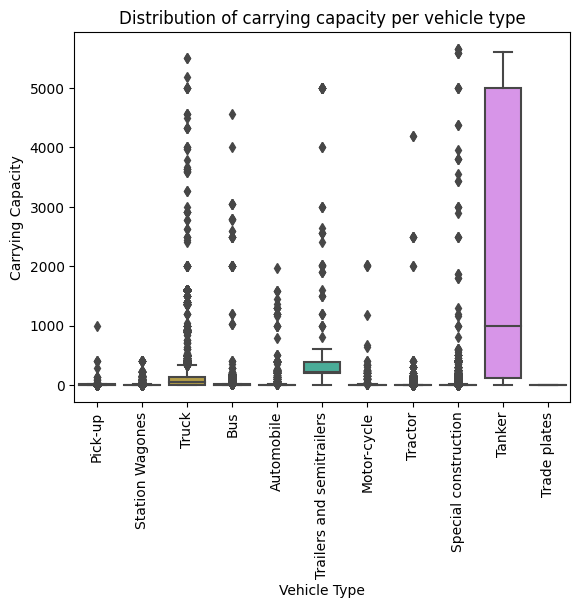

In [33]:
# remove outliers in the carrying capacity column
print('Before the outliers are removed:', len(vdf))

# find the upper and lower limits
lower_limit = vdf['CARRYING_CAPACITY'].mean() - (1.5 * vdf['CARRYING_CAPACITY'].std())
upper_limit = vdf['CARRYING_CAPACITY'].mean() + (1.5 * vdf['CARRYING_CAPACITY'].std())

# find outliers
vdf_outliers = np.where(vdf['CARRYING_CAPACITY'] > upper_limit, True,
                       np.where(vdf['CARRYING_CAPACITY'] < lower_limit, True, False))

# remove outliers
vdf = vdf.loc[~(vdf_outliers)]

print('After the outliers are removed:', len(vdf))

# plot
sns.boxplot(data = vdf, x='TYPE_VEHICLE', y='CARRYING_CAPACITY')
plt.ylabel('Carrying Capacity')
plt.xlabel('Vehicle Type')
plt.xticks(rotation = 90)
plt.title('Distribution of carrying capacity per vehicle type')

Text(0.5, 1.0, 'Distribution of number of seats per vehicle type')

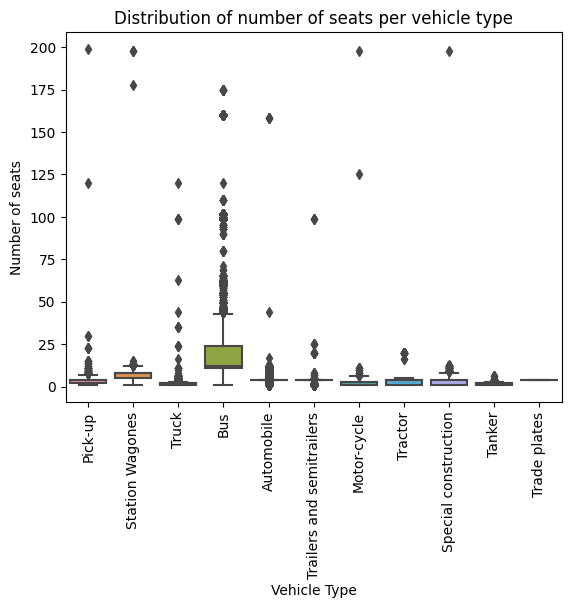

In [34]:
# check the distribution of number of seats per vehicle
sns.boxplot(data = vdf, x='TYPE_VEHICLE', y='SEATS_NUM')
plt.ylabel('Number of seats')
plt.xlabel('Vehicle Type')
plt.xticks(rotation = 90)
plt.title('Distribution of number of seats per vehicle type')

Before the outliers are removed: 438647
After the outliers are removed: 419320


Text(0.5, 1.0, 'Distribution of number of seats per vehicle type')

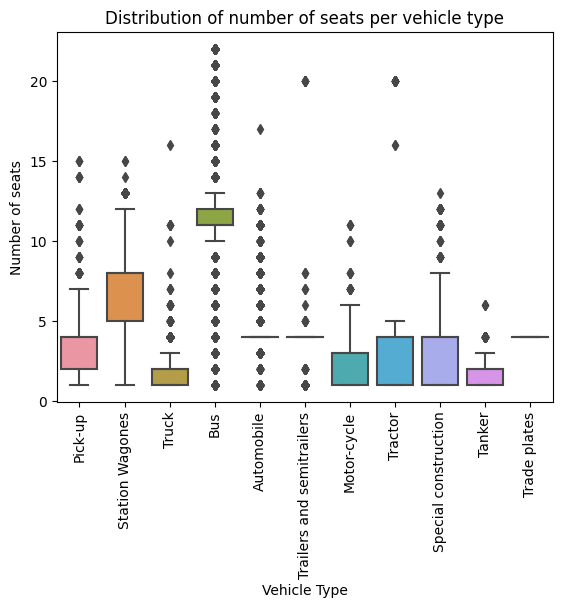

In [35]:
# remove outliers in the number of seats column
print('Before the outliers are removed:', len(vdf))

# find lower and upper limits
lower_limit = vdf['SEATS_NUM'].mean() - (1.5 * vdf['SEATS_NUM'].std())
upper_limit = vdf['SEATS_NUM'].mean() + (1.5 * vdf['SEATS_NUM'].std())

# find outliers
vdf_outliers = np.where(vdf['SEATS_NUM'] > upper_limit, True,
                       np.where(vdf['SEATS_NUM'] < lower_limit, True, False))

# remove outliers
vdf = vdf.loc[~(vdf_outliers)]

print('After the outliers are removed:', len(vdf))

# plot
sns.boxplot(data = vdf, x='TYPE_VEHICLE', y='SEATS_NUM')
plt.ylabel('Number of seats')
plt.xlabel('Vehicle Type')
plt.xticks(rotation = 90)
plt.title('Distribution of number of seats per vehicle type')

I'll export the files so I can do some EDA with it using R